In [ ]:
cd /content/floraison

/content/floraison


In [ ]:
!pip install scrapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 4.8 MB/s eta 0:00:00


In [ ]:
!scrapy

Scrapy 2.12.0 - no active project

Usage:
  scrapy <command> [options] [args]

Available commands:
  bench         Run quick benchmark test
  fetch         Fetch a URL using the Scrapy downloader
  genspider     Generate new spider using pre-defined templates
  runspider     Run a self-contained spider (without creating a project)
  settings      Get settings values
  shell         Interactive scraping console
  startproject  Create new project
  version       Print Scrapy version
  view          Open URL in browser, as seen by Scrapy

  [ more ]      More commands available when run from project directory

Use "scrapy <command> -h" to see more info about a command


In [ ]:
!scrapy startproject floraisonscraper

New Scrapy project 'floraisonscraper', using template directory '/usr/local/lib/python3.11/dist-packages/scrapy/templates/project', created in:
    /content/floraison/floraisonscraper

You can start your first spider with:
    cd floraisonscraper
    scrapy genspider example example.com


In [ ]:
cd /content/floraison/floraisonscraper/floraisonscraper/spiders

/content/floraison/floraisonscraper/floraisonscraper/spiders


In [ ]:
!scrapy genspider floraison https://floraison.bio/en/

Created spider 'floraison' using template 'basic' in module:
  floraisonscraper.spiders.floraison


In [ ]:
!scrapy shell

2025-03-07 12:27:58 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: floraisonscraper)
2025-03-07 12:27:58 [scrapy.utils.log] INFO: Versions: lxml 5.3.1.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2025-03-07 12:27:58 [scrapy.addons] INFO: Enabled addons:
[]
2025-03-07 12:27:58 [asyncio] DEBUG: Using selector: EpollSelector
2025-03-07 12:27:58 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-03-07 12:27:58 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2025-03-07 12:27:58 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-03-07 12:27:58 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
20

In [ ]:
%%writefile floraison.py
import scrapy


class FloraisonSpider(scrapy.Spider):
    name = "floraison"
    allowed_domains = ["floraison.bio"]
    start_urls = ["https://floraison.bio"]

    def parse(self, response):
      all_product=response.css('div.center.collection__view-all a::attr(href)').get()
      all_product_url='https://floraison.bio' + all_product
      yield response.follow(all_product_url,callback=self.parse_all_product)
    def parse_all_product(self,response):
      yield from self.parse_product(response)
      for i in range(2,13):
          next_page=response.url+'?page='+str(i)
          yield response.follow(next_page,callback=self.parse_product)
    def parse_product(self,response):
        products=response.css('h3.card__heading.h5')
        for p in products:
          url=p.css('a::attr(href)').get()
          yield response.follow(url,callback=self.parse_product_info)
    def parse_product_info(self,response):
        yield{
            'name':response.css('div.product__title h1::text').get(),
            'price':response.css('span.price-item.price-item--regular::text').get(),
            'description':response.css('div.product__description.rte.quick-add-hidden p::text').get(),
        }

Overwriting floraison.py


In [ ]:
%cd /content/floraison/floraisonscraper

/content/floraison/floraisonscraper


In [ ]:
!scrapy crawl floraison -o data.csv

2025-03-07 12:29:53 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: floraisonscraper)
2025-03-07 12:29:53 [scrapy.utils.log] INFO: Versions: lxml 5.3.1.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2025-03-07 12:29:53 [scrapy.addons] INFO: Enabled addons:
[]
2025-03-07 12:29:53 [asyncio] DEBUG: Using selector: EpollSelector
2025-03-07 12:29:53 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-03-07 12:29:53 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2025-03-07 12:29:53 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-03-07 12:29:53 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
20

In [ ]:
!scrapy crawl floraison -o floraisonscraper.json

2025-03-07 12:30:21 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: floraisonscraper)
2025-03-07 12:30:21 [scrapy.utils.log] INFO: Versions: lxml 5.3.1.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2025-03-07 12:30:21 [scrapy.addons] INFO: Enabled addons:
[]
2025-03-07 12:30:21 [asyncio] DEBUG: Using selector: EpollSelector
2025-03-07 12:30:21 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-03-07 12:30:21 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2025-03-07 12:30:21 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-03-07 12:30:21 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
20

In [ ]:
%cd /content/floraison/floraisonscraper/floraisonscraper/spiders

/content/floraison/floraisonscraper/floraisonscraper/spiders


In [ ]:
!scrapy crawl floraison -o floraisonscraper.json

2025-03-07 12:39:42 [scrapy.utils.log] INFO: Scrapy 2.12.0 started (bot: floraisonscraper)
2025-03-07 12:39:42 [scrapy.utils.log] INFO: Versions: lxml 5.3.1.0, libxml2 2.12.9, cssselect 1.2.0, parsel 1.10.0, w3lib 2.3.1, Twisted 24.11.0, Python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0], pyOpenSSL 24.2.1 (OpenSSL 3.3.2 3 Sep 2024), cryptography 43.0.3, Platform Linux-6.1.85+-x86_64-with-glibc2.35
2025-03-07 12:39:42 [scrapy.addons] INFO: Enabled addons:
[]
2025-03-07 12:39:42 [asyncio] DEBUG: Using selector: EpollSelector
2025-03-07 12:39:42 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-03-07 12:39:42 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
2025-03-07 12:39:42 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.asyncioreactor.AsyncioSelectorReactor
2025-03-07 12:39:42 [scrapy.utils.log] DEBUG: Using asyncio event loop: asyncio.unix_events._UnixSelectorEventLoop
20

                                    name                         price  \
0           Eau Florale de Rose De Damas  \n        18.000 TND\n         
1  Paradise Smell Crème Déodorante Femme  \n        21.000 TND\n         
2              Gel Nettoyant Velvet Skin  \n        36.000 TND\n         
3                             Savon Noir  \n        26.000 TND\n         
4                      Crème Velvet Skin  \n        35.100 TND\n         

                                         description  
0  Notre Eau florale de Rose de Damas est un ingr...  
1  Découvrez la Crème Déodorante Femme Paradise S...  
2  Le Gel Nettoyant purifiant Velvet Skin de Flor...  
3  Redécouvrez le rituel ancestral du hammam avec...  
4  Crème Velvet Skin : Une peau nette, mate et éc...  
                                    name                         price  \
0           Eau Florale de Rose De Damas  \n        18.000 TND\n         
1  Paradise Smell Crème Déodorante Femme  \n        21.000 TND\n         
2  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                  text  cluster  \
0    Eau Florale de Rose De Damas Notre Eau florale...        2   
1    Paradise Smell Crème Déodorante Femme Découvre...        2   
2    Gel Nettoyant Velvet Skin Le Gel Nettoyant pur...        4   
3    Savon Noir Redécouvrez le rituel ancestral du ...        2   
4    Crème Velvet Skin Crème Velvet Skin : Une peau...        4   
..                                                 ...      ...   
165  Eau de Soin Fraîche Acne Free Skin Notre Eau d...        4   
166  Serum Hair Pro Offrez à vos cheveux un soin d'...        2   
167  Hydrolat De Romarin Découvrez l'Hydrolat de Ro...        2   
168  Gel Nettoyant White System Le gel nettoyant ex...        2   
169  Huile Végétale de Pépins de Figue de Barbarie ...        2   

     cluster_stemmed  
0                  0  
1                  0  
2                  3  
3                  3  
4                  0  
..               ...  
165                0  
166        

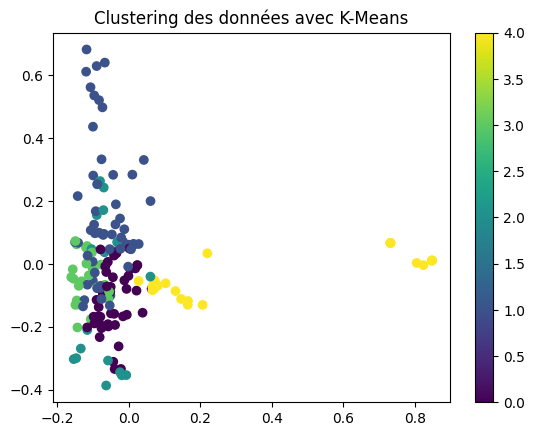

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Charger les données JSON
df = pd.read_json('floraisonscraper.json')

# Afficher les premières lignes pour vérifier
print(df.head())
# Fusionner les colonnes name et description
df['text'] = df['name'] + " " + df['description'].fillna('')

# Nettoyer le texte (supprimer les sauts de ligne et autres caractères indésirables)
df['text'] = df['text'].str.replace('\n', ' ').str.replace('\r', ' ')

# Afficher le DataFrame
print(df[['name', 'price', 'text']].head())

# Instancier TfidfVectorizer avec des paramètres pour ignorer les termes trop fréquents ou trop rares
vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')

# Créer la matrice TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['text'])

# Afficher les termes et la taille de la matrice
print("Termes inclus dans la matrice TF-IDF:", vectorizer.get_feature_names_out())
print("Taille de la matrice TF-IDF:", tfidf_matrix.shape)


# Instancier KMeans avec 5 clusters (vous pouvez ajuster ce nombre)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Appliquer le clustering
kmeans.fit(tfidf_matrix)

# Ajouter les labels des clusters au DataFrame
df['cluster'] = kmeans.labels_

# Afficher le nombre d'éléments dans chaque cluster
print(df['cluster'].value_counts())

# Afficher le contenu des clusters
for cluster in range(5):
    print(f"Cluster {cluster}:")
    print(df[df['cluster'] == cluster]['text'].values)


# Télécharger les stop words en français
nltk.download('stopwords')


# Liste des stop words en français
french_stop_words = stopwords.words('french')

# Instancier TfidfVectorizer avec les stop words français
vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words=french_stop_words)

# Créer la matrice TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['text'])


# Définir une fonction pour appliquer le stemming
stemmer = SnowballStemmer("french")

def stemmed_words(doc):
    return " ".join([stemmer.stem(word) for word in doc.split()])

# Appliquer le stemming à la colonne text
df['text_stemmed'] = df['text'].apply(stemmed_words)

# Instancier TfidfVectorizer avec les stop words français et le stemming
vectorizer = TfidfVectorizer(max_df=0.5, min_df=5, stop_words=french_stop_words)

# Créer la matrice TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['text_stemmed'])

# Appliquer K-Means à nouveau
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(tfidf_matrix)

# Ajouter les labels des clusters au DataFrame
df['cluster_stemmed'] = kmeans.labels_

# Afficher les résultats
print(df[['text', 'cluster', 'cluster_stemmed']])

# Réduire la dimension à 2D
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf_matrix.toarray())

# Visualiser les clusters
plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], c=df['cluster_stemmed'], cmap='viridis')
plt.colorbar()
plt.title("Clustering des données avec K-Means")
plt.show()
df.to_csv('floraisonscraper.csv',index=False)